# Name(s): Peijie Yang (py2554); Pengdi Xia (px353)

# Assignment 2: Intro to Clustering

In this assignment we'll be looking at three popular types of clustering algorithms -- K-Means clustering, Hierarchical clustering and Density Based clustering. We'll also look at some measures of cluster quality like cohesion, separation and silhoutte coefficient.

## Part 1: K Means Clustering

In k means clustering you are given a dataset and a hyperparameter k specifying the number of desired of output clusters. The basic idea of k means is to minimize the sum of squared error (SSE) of the output clusters. Unfortunately, the solution to this problem is NP Hard. In this assignment we'll be implementing the iterative algorithm that produces the locally optimal solution to this problem but guarantees convergence.

In [1]:
# Some headers
import random
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import rand
from numpy import square, sqrt

In [2]:
# Enable inline mode for matplotlib so that IPython displays graphs.
%matplotlib inline

In [3]:
# get data from text file
data = np.genfromtxt("data.csv", delimiter=",")

Q1. Implement the function `generateClusters` that returns clusters, given the cluster centroids (`mu`) and the dataset (`data`). Each datapoint needs to be associated to the closest cluster centroid.

In [4]:
def generateClusters(data, mu):
    # your code goes here
    clusters=[]
    
    #subset of data for each cluster
    for i in range( len(mu)):
        subset = []
        clusters.append(subset)
    for j in range (len(data)):
        #store index
        index = 0
        min_dist = 10000
        #for each data compare to the each cluster to find a closest one
        for k in range(len(mu)):
            temp_dist = sqrt(square(data[j][0]- mu[k][0]) + square(data[j][1] - mu[k][1]))
            if temp_dist < min_dist:
                min_dist = temp_dist
                index = k
        clusters[index].append(data[j])
    return clusters

Q2. Implement the function `recompute_centroids` that returns the centroids given a set of input clusters. Hint: you need to calculate the mean for each cluster.

In [5]:
def recompute_centroids(clusters):
    # your code goes here
    centroids = []
    for i in range(len(clusters)):
        centroids.append(sum(clusters[i]) / len(clusters[i]))
    return centroids

Q3. Implement the function `checkConvergence` that checks if the termination condition of k means algorithm has reached, i.e. the previous centroids are the same as the new centroids. 

In [6]:
def checkConvergence(mu, previous_mu):
    # your code goes here
    return np.array_equal(mu, previous_mu)

Q4. Implement the function `kMeansClustering` that returns k clusters along with their centroids given the input dataset and the desired number of clusters (`k`).

In [7]:
def kMeansClustering(data, k):
    #initalize k random index
    rand_init_list = random.sample(range(0,len(data)),k)
    clusters = []
    mu = []
    previous_mu = []
    temp = 0
    #find the data point with k`s index as inital centroids
    for i in range (len(rand_init_list)):
        mu.append(data[rand_init_list[i]])
    while not checkConvergence(mu, temp):
        clusters = generateClusters(data,mu)
        temp = mu
        mu = recompute_centroids(clusters)
    return mu, clusters

In [8]:
def calculateCohesion(clusters):
    result = 0
    for i in range(len(clusters)):
        centroid = sum((clusters[i])) / len(clusters[i])
        for j in range(len(clusters[i])):
            result += square(clusters[i][j][0] - centroid[0]) + square(clusters[i][j][1] - centroid[1])
    return result

In [9]:
def calculateSeparation(clusters, data):
    generalCentroid = sum(data) / len(data)
    result = 0
    for i in range(len(clusters)):
        thisCentroid = sum((clusters[i])) / len(clusters[i])
        result +=  len(clusters[i]) * (square(generalCentroid[0] - thisCentroid[0]) + square(generalCentroid[1] - thisCentroid[1]))
    return result

Q5. Cluster the data present in `data.csv` using `kMeansClustering` with `k = 5`. Display the clusters using `plt.scatter`, make sure to mark different clusters with a different color. Also calculate the average cohesion and separation for the generated clusters.

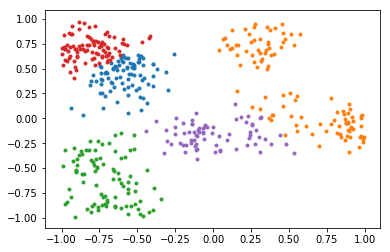

Cohesion for k-means is: 44.7581642328
Separation for k-means is: 227.954340139


In [10]:
# your code goes here
mu, clusters = kMeansClustering(data, 5)
for i in range(len(clusters)):
    oneset_cluster = np.array(clusters[i])
    plt.scatter(oneset_cluster[:,0],oneset_cluster[:,1], marker = '.')
plt.show()

print("Cohesion for k-means is: "+ str(calculateCohesion(clusters)))
print("Separation for k-means is: "+ str(calculateSeparation(clusters,data)))

Q6. Find the best k for this dataset by plotting SSE vs k for k = 1-10. Based on your plot, which value of k would you choose and why?

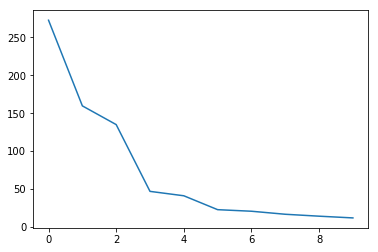

In [11]:
# your code goes here
sse = []
for k in range (1,11):
    mu, clusters = kMeansClustering(data, k)
    temp = 0
    for i in range(len(mu)):
        for j in range(len(clusters[i])):
            temp += square(clusters[i][j][0]-mu[i][0])+square(clusters[i][j][1]-mu[i][1])
    sse.append(temp)
plt.plot(range(len(sse)),sse)

## Part 2: Hierarchical Clustering

For this part you'll be implementing single-linkage clustering, one of several methods of hierarchical clustering. It is based on grouping clusters in bottom-up fashion (agglomerative clustering), at each step combining two clusters that contain the closest pair of elements not yet belonging to the same cluster as each other. In the beginning of the agglomerative clustering process, each element is in a cluster of its own. The clusters are then sequentially combined into larger clusters, until all elements end up being in the same cluster. At each step, the two clusters separated by the shortest distance are combined. Here distance is defined as the euclidean distance between the two points.

In [12]:
# get data from text file
data = np.genfromtxt("data2.csv", delimiter=",")
print (data)

[[-0.23604872 -0.83012675]
 [-0.20753952 -0.66550322]
 [-0.48108096 -0.46727384]
 [-0.27729046 -0.59349899]
 [-0.04479072 -0.5984576 ]
 [-0.13136382 -0.67378397]
 [-0.11719707 -0.76280307]
 [-0.57597308  0.02505388]
 [-0.00095456 -0.13908238]
 [-0.13936793 -0.18521367]
 [-0.01954153  0.11605246]
 [-0.05791985 -0.21984893]
 [-0.29589549 -0.12918766]
 [-0.1101182  -0.03476591]
 [ 0.20765516  0.81449598]
 [ 0.2755254   0.62343378]
 [ 0.55693317  0.59108196]
 [ 0.4974992   0.64904387]
 [ 0.19195484  0.64492109]
 [ 0.75587755  0.408303  ]]


Q7. Implement single-linkage clustering. Print the cophenetic correlation coefficient (CPCC) for the resultant clustering.

In [13]:
# your code goes here
def calculateDistance(data1,data2):
    distance =  sqrt(square(data1[0] - data2[0]) + square(data1[1] - data2[1]))
    return distance

In [14]:
def initialMatrix(data): 
    result = []
    for i in range(len(data)):
        temp = []
        for j in range(len(data)):
            if i == j: 
                temp.append(100)
            else:
                temp.append(calculateDistance(data[i],data[j]))
        result.append(temp)
    return result
            

In [15]:
def initialCPCC(data):
    result = []
    for i in range(len(data)):
        temp = []
        for j in range(len(data)):
            temp.append(0)
        result.append(temp)
    return result

In [16]:
def getMinIndex(data):
    minDist = 1000
    row = col = 0
    for i in range(len(data) - 1):
        for j in range(i + 1,len(data)):
            if data[i][j] < minDist:
                minDist = data[i][j]
                row = i
                col = j
    else: 
        return row,col

In [17]:
init_matrix = initialMatrix(data)
CPCC = initialCPCC(data)
used_points = []
current_matrix = init_matrix
row, col = getMinIndex(init_matrix)
group = [[]]
while(len(group[0]) != len(data)):
    row, col = getMinIndex(current_matrix)
    mark = 0
    mark2 = []
    temp1 = []
    temp2 = []
    index = 0
    for x in group: 
        if (row in x and col not in x):
            temp1 = x
            mark = 1
        if (row not in x and col in x):
            temp2 = x
            mark = 1
            
    if (temp1 != temp2 and len(temp1) != 0 and len(temp2) != 0):
        if (group.index(temp1) < group.index(temp2)):
            index = group.index(temp1)
            group[group.index(temp1)] = group[group.index(temp1)] + (temp2)
            group.remove(temp2)
            mark2 = group[index]
            
        else: 
            index = group.index(temp2)
            group[group.index(temp2)] = group[group.index(temp2)] + (temp1)
            group.remove(temp1)
            mark2 = group[index]
            
        for i in temp1: 
            for j in temp2: 
                CPCC[j][i] = current_matrix[row][col]
                CPCC[i][j] = current_matrix[row][col]
    
    if (len(temp1) == 0 and len(temp2) != 0):
        mark2 = temp2 + [row]
        group[group.index(temp2)].append(row)
        for i in mark2: 
            if (i != row):
                CPCC[row][i] = current_matrix[row][col]
                CPCC[i][row] = current_matrix[row][col]
                
        
    if (len(temp2) == 0 and len(temp1) != 0):
        mark2 = temp1 + [col]
        group[group.index(temp1)].append(col)
        for i in mark2: 
            if (i != col):
                CPCC[i][col] = current_matrix[row][col]
                CPCC[col][i] = current_matrix[row][col]
        
        
    if (mark == 0):
        if(len(group[0]) ==0):
            group[0] = [row,col]
        else:
            group.append([row,col])
        mark2 = [row,col]
        CPCC[row][col] = current_matrix[row][col]
        CPCC[col][row] = current_matrix[row][col]
        
        
    for i in mark2:
        for j in mark2:
            if (i != j):
                current_matrix[i][j] = 100
    min_dist = []
    for a in range(len(data)): 
        min_distance = 1000
        for b in mark2: 
            if (a not in mark2 and current_matrix[a][b] < min_distance):
                min_distance = current_matrix[a][b]
        min_dist.append(min_distance)
                
    for c in range(len(data)): 
        for d in mark2: 
            if (c not in mark2):
                current_matrix[c][d] = min_dist[c]
    
    if (row not in used_points):
        used_points.append(row)
    if (col not in used_points):
        used_points.append(col)

data_list = []
cpcc_list = []
init_matrix = initialMatrix(data)
for i in range(len(data) - 1):
        for j in range(i + 1,len(data)):
            data_list.append(init_matrix[i][j])
            cpcc_list.append(CPCC[i][j])
            
cor_list = np.corrcoef(data_list,cpcc_list)
print("so the CPCC is: " + str(cor_list[0][1]))

so the CPCC is: 0.880839555213


## Part 3: Density Based Clustering (DBSCAN)

For this part we'll be implementing DBSCAN, one of the most popular density based clustering algorithms.

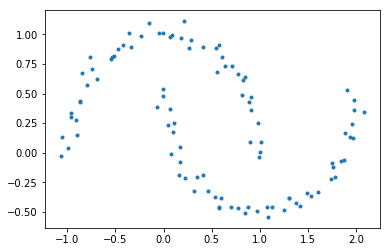

In [18]:
# get data from text file
data = np.genfromtxt("data3.csv", delimiter=",")
plt.scatter(data[:,0],data[:,1], marker='.')

Q8. Run your `kMeansClustering` with `k = 2` and display the output clusters (make sure that different clusters are marked with different colors). Also display the cohesion and separation values for the clusters. What do you observe?

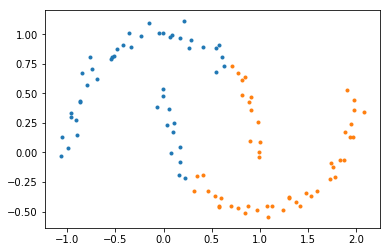

Cohesion for k-means is: 40.7762283032
Separation for k-means is: 59.4456987565


In [19]:
# your code goes here
mu, clusters = kMeansClustering(data, 2)
for i in range(len(clusters)):
    oneset_cluster = np.array(clusters[i])
    plt.scatter(oneset_cluster[:,0],oneset_cluster[:,1], marker='.')
plt.show()
print("Cohesion for k-means is: "+ str(calculateCohesion(clusters)))
print("Separation for k-means is: "+ str(calculateSeparation(clusters,data)))

Q9. Implement the DBSCAN algorithm and display output clusters. DBSCAN requires two parameters: epsilon and the minimum number of points required to form a dense region (minPts). A good starting point for epsilon is `0.3` and `minPts = 2`. You should tweak these values and observe how the resultant clusters change.

In [20]:
def cal_dist(data1,data2):
    return sqrt(square(data1[0] - data2[0]) + square(data1[1] - data2[1]))

In [21]:
def neighbor_list(epsilon):
    
    # each point will have a neigbor list
    temp_list=[]
    dist = 0
    for i in range(len(data)):
        subset = []
        for j in range (len(data)):
            dist = cal_dist(data[i],data[j])
            if i !=j and dist <= epsilon:
                subset.append(j)
        temp_list.append(subset)
    return temp_list

In [22]:
def check_mark(index, cluster, neighbor):
    for i in range(len(neighbor[index])):
        if data2[neighbor[index][i]] not in cluster:
            return False
    return True

In [23]:
def recursive(index, cluster, neighbor,minPts):
    # base case
    # only have one neighbor
    if len(neighbor[index])<minPts:
        return cluster
    elif check_mark(index, cluster, neighbor):
        if data2[index] not in cluster:
            cluster.append(data2[index])
        return cluster
    
    # recursive part
    cluster.append(data2[index])
    for i in range(len(neighbor[index])):
        if data2[neighbor[index][i]] not in cluster:
            cluster = recursive(neighbor[index][i], cluster, neighbor,minPts)
    return cluster

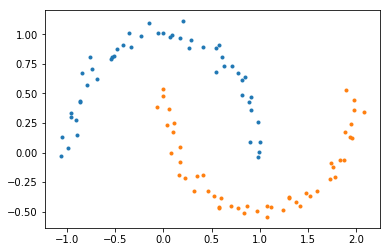

In [24]:
from operator import itemgetter
minPts = 2
epsilon = 0.3
clusters = []
neighbor = neighbor_list(epsilon)
data2 = data.tolist()
# go recursive all data
for i in range(len(data)):
    cluster = []
    cluster = recursive(i, cluster, neighbor, minPts)
    cluster.sort(key=itemgetter(0))
    if len(cluster)>= minPts and cluster not in clusters:
        clusters.append(cluster)
for i in range(len(clusters)):
    partial_cluster = np.array(clusters[i])
    plt.scatter(partial_cluster[:,0],partial_cluster[:,1], marker='.')
plt.show()

Q10. Display the separation and cohesion values for the output clusters obtained in Q9. How are the clusters obtained in Q9 different from the ones obtained in Q8?

In [25]:
# your code goes here
#cast data back to numpy array
for i in range(len(clusters)):
    for j in range(len(clusters[i])):
        clusters[i][j] = np.asarray(clusters[i][j])
print("Cohesion for k-means is: "+ str(calculateCohesion(clusters)))
print("Separation for k-means is: "+ str(calculateSeparation(clusters,data)))

Cohesion for k-means is: 61.2032625579
Separation for k-means is: 39.0186645018


In [ ]:
# here it is more accurate to use DBSCAN to generate clusters.